In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append('..')


model1
0.6967	0.7258	0.7018	0.3933	0.796
0.8099	0.7538	0.7538	0.6288	0.8879
0.7851	0.7705	0.7742	0.5706	0.8557
0.7107	0.7213	0.7119	0.4214	0.81
0.8347	0.8254	0.8167	0.6697	0.9208
0.7673	0.7596	0.7525	0.5349	0.8458
model2
0.6721	0.7273	0.7368	0.3532	0.7749
0.7355	0.6875	0.6923	0.4775	0.8382
0.7603	0.7679	0.7903	0.5204	0.8505
0.7521	0.7424	0.7119	0.5041	0.8395
0.8099	0.8276	0.8333	0.6207	0.8768
0.7459	0.7492	0.7525	0.4918	0.8326
model4
0.7049	0.7544	0.7544	0.4159	0.7978
0.7603	0.7143	0.7231	0.5256	0.8805
0.7851	0.7895	0.8065	0.5699	0.868
0.7686	0.7429	0.6949	0.5402	0.8551
0.8347	0.8727	0.8833	0.673	0.9041
0.7706	0.7715	0.7723	0.5413	0.8591


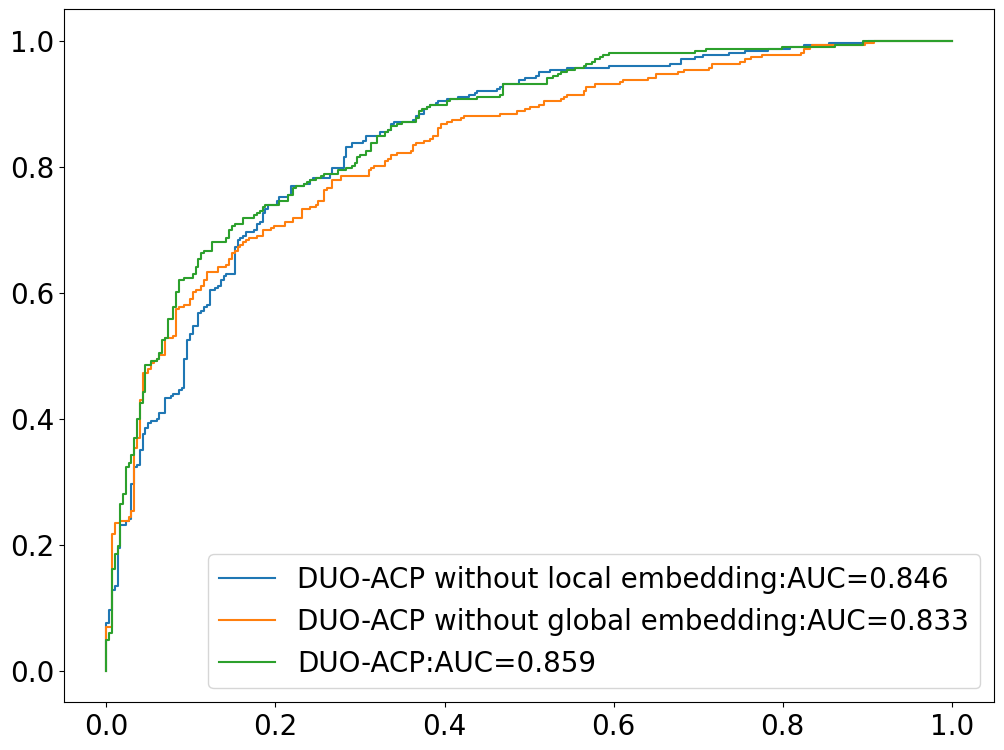

In [2]:
from metric import compute_metric
import numpy as np
import matplotlib.pyplot as plt

import pickle

runtime = '2023-09-25_21-34-16'
plt.figure(figsize=(12,9))
plt.rcParams.update({'font.size': 20})
name_list = ['', 'DUO-ACP without local embedding', 'DUO-ACP without global embedding', 'DUO-ACP without length', 'DUO-ACP']
for model_idx in [1, 2, 4]:
    name = f'model{model_idx}'
    print(name)
    output_list, labels_list = [], []
    for i in range(1, 6):
        data_dir = f'../datasets/ACP-Mixed-80-5fold/test_{i}.tsv'
        pkl_path = f'../result/binary/{runtime}/{name}/{i}.pkl'
        if os.path.exists(pkl_path) == False:
            print(f"{pkl_path} not exists")
            continue
        with open(pkl_path, 'rb') as fr:
            pkl = pickle.load(fr)
            outputs, labels = pkl
            compute_metric(labels[:, 1], outputs[:, 1], thres=0.5)
            output_list.append(outputs)
            labels_list.append(labels)
    output_list, labels_list = np.vstack(output_list), np.vstack(labels_list)
    auroc_val, fpr, tpr = compute_metric(labels_list[:, 1], output_list[:, 1], thres=0.5)
#    print(len(output_list))
    plt.plot(fpr, tpr, label = f'{name_list[model_idx]}:AUC={round(auroc_val, 3)}')
plt.legend()
